# 基本的なクラスター分析

## ライブラリのインポート

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# K近傍法を行うために必要なKMeansモジュールをインポートします
from sklearn.cluster import KMeans

## データの読み込み

In [2]:
# データをよみこみます
data = pd.read_csv('3.01. Country clusters.csv')

In [3]:
# データの中身の確認
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


## mapメソッドを使った割り当て

In [4]:
# 元のデータのコピーの作成
data_mapped = data.copy()
# 言語を0,1,2に置き換えていきます
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
# 中身を確認します
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


## 特徴量の選択

In [5]:
# ilocメソッドを使って使う特徴量を取り出していきます
x = data_mapped.iloc[:,1:4]

In [6]:

# 中身を確認します
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


## クラスタリング

In [7]:
# クラスからオブジェクトを作成します
kmeans = KMeans(2)

In [8]:
# モデルにデータをフィットさせます
kmeans.fit(x)

/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

## クラスタリングの結果

In [9]:
# クラスタリングの結果を変数に格納していきます
identified_clusters = kmeans.fit_predict(x)
# 中身を確認します
identified_clusters

/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 0], dtype=int32)

In [10]:
# mapメソッドを使って変換したデータを変数に格納します
data_with_clusters = data_mapped.copy()
# クラスタリングした結果を追加していきます
data_with_clusters['Cluster'] = identified_clusters
# 中身を確認します
data_with_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,0,1
1,Canada,62.40,-96.80,0,1
2,France,46.75,2.40,1,1
3,UK,54.01,-2.53,0,1
4,Germany,51.15,10.40,2,1
5,Australia,-25.45,133.11,0,0


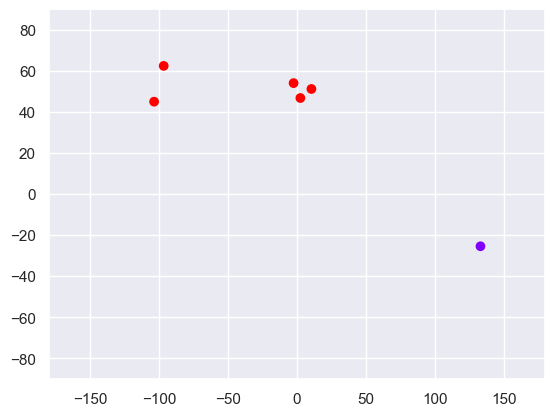

In [18]:
# 経度と緯度をそれぞれの軸にとってプロットしていきます
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## クラスターの数の選択

### WCSS (within-cluster sum of squares　クラスター内の二乗の合計)

In [24]:
# 今のWCSSの値
#kmeans.inertia_
kmeans.inertia_

0.0

In [35]:
# 空のリストの作成
#wcss=[]
wcss=[]
# for文を使ってそれぞれのクラスターの場合のECSSを計算
#for i in range(1,7):
    #kmeans = KMeans(i)
    #kmeans.fit(x)
    #wcss_iter = kmeans.inertia_
    #wcss.append(wcss_iter)

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/xerzat/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fr

In [34]:
# 結果の表示
#wcss
wcss

[42605.41356666667,
 13208.958119999996,
 290.1052333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

### エルボー法

Text(0, 0.5, 'Within-cluster Sum of Squares')

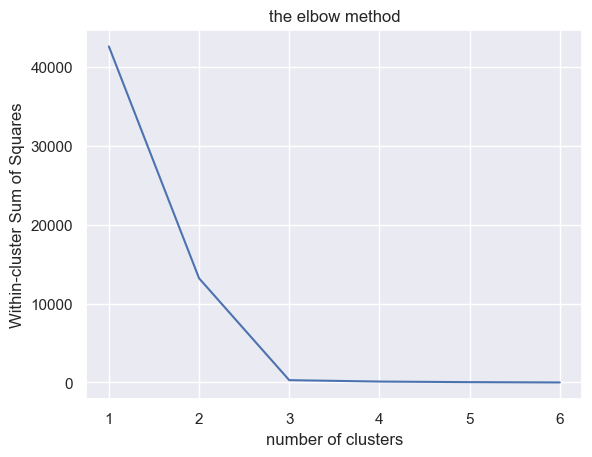

In [30]:
# 横軸として1から6の数字を取ります
#number_clusters = range(1,7)
number_clusters = range(1,7)
# クラスターの数とWCSSでプロットしていきます
#plt.plot(number_clusters,wcss)
plt.plot(number_clusters,wcss)
# グラフに名前をつけます
plt.title('The Elbow Method')
plt.title('the elbow method')

# x軸に名前を付けます
#plt.xlabel('Number of clusters')
plt.xlabel('number of clusters')

# y軸に名前を付けます
#plt.ylable('within-cluster sum of squares')
plt.ylabel('Within-cluster Sum of Squares')

In [31]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.1052333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]